In [25]:
# Dependencies
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import requests
import random
from citipy import citipy
import json

In [28]:
# create the URL path
url="https://api.openweathermap.org/data/2.5/weather"
#read api key from file and store. Assuming that the api_key exists in the file has api_key in json format
file = open("my_api_key.json", "r") 
json_data = file.read()
data = json.loads(json_data)
api_key = data["api_key"]
# create url params
params = {"appid":api_key}
#Creating a data frame with the below coloumns
columns=["City", "Latitude", "Longitude", "Cloudiness", "Humidity", "Max Temp", "Wind Speed", "Country", "Date"]
city_weather_df = pd.DataFrame(columns=columns)

In [29]:
# Creating a counter (initializing with zero)which will break once we get 550cities
num_cities = 0
# get the list of cities
cities = list(citipy.WORLD_CITIES_DICT.keys())
#randomize the city list
random.shuffle(cities)
#Perform API Calls
for city in cities:
    params['lat'] = city[0]
    params['lon'] = city[1]
    req = requests.get(url, params=params)
    print("Requesting URL: " + req.url)
    location = req.json()
    try: 
        city_name = location["name"]
        Latitude=location["coord"]["lat"]
        Longitude=location["coord"]["lon"]
        Cloudiness=location["clouds"]["all"]
        Humidity=location["main"]["humidity"]
        MaxTemp=location["main"]["temp_max"]
        WindSpeed=location["wind"]["speed"]
        Country=location["sys"]["country"]
        Date=location["dt"]
        current_city_data= {
            "City":[city_name],
            "Latitude":[Latitude],
            "Longitude":[Longitude],
            "Cloudiness":[Cloudiness],
            "Humidity":[Humidity],
            "Max Temp":[MaxTemp],
            "Wind Speed":[WindSpeed],
            "Country":[Country],
            "Date":[Date]
        }
        city_weather_df = city_weather_df.append(pd.DataFrame.from_dict(current_city_data))
        num_cities += 1
        if num_cities == 550:
            break
    except KeyError:
        print("Error with city data. Skipping")
        continue

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-26.833333&lon=-49.3
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-7.733333&lon=110.366667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=49.552243&lon=13.06993
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=44.9669444&lon=15.9430556
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=17.906495&lon=121.72625
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=26.233333&lon=90.583333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-23.383333&lon=-51.45
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed73

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=49.7697222&lon=5.9822222
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=51.633333&lon=7.633333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=48.398694&lon=37.847873
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=32.9311111&lon=-96.4594444
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=14.678889&lon=120.266111
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=18.3328&lon=120.6177
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=11.839722&lon=125.061389
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90c

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=44.583333&lon=129.416667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-10.75&lon=34.9
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=50.382778&lon=106.105556
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=4.918574&lon=-74.027993
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=44.616667&lon=26.116667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=12.05&lon=-84.9833333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=22.833333&lon=-99.333333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=50.583333&lon=5.633333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=47.866667&lon=23.433333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=15.55&lon=-87.65
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=40.532157&lon=-7.851525
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=42.009552&lon=-4.524063
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=34.8697222&lon=-111.7602778
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=20.65&lon=-100.5
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45a

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=32.216667&lon=130.4
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=47.966667&lon=7.95
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=17.928511&lon=103.955192
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=59.283333&lon=10.333333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=45.416667&lon=27.0
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=48.083333&lon=16.283333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=52.290352&lon=17.873101
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=58.738307&lon=49.458221
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=4.85&lon=100.733333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=18.383333&lon=78.833333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=43.507222&lon=124.812222
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=34.483333&lon=133.366667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=47.424076&lon=-0.524165
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=50.111789&lon=129.443761
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=45.85&lon=8.833333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=50.623079&lon=26.22743
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=26.766667&lon=-109.666667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=42.700077&lon=47.244882
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=40.6&lon=21.7833333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=44.506111&lon=12.056389
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=51.066667&lon=13.016667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=48.85&lon=20.9333333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=48.616667&lon=12.216667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=55.5113&lon=41.0811
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=39.0347222&lon=-76.9077778
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=40.8041667&lon=-74.0125
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=17.077778&lon=78.201111
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=14.2833333&lon=-86.6
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=15.6361&lon=119.9379
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=26.715&lon=-80.0536111
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=37.99&lon=-84.1797222
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=52.902144&lon=16.564126
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=49.945519&lon=36.040573
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=60.2&lon=12.0
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=45.633333&lon=27.8
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&l

In [35]:
# Display the city_weather Data Frame
city_weather_df.head()
city_weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Latitude      550
Longitude     550
Max Temp      550
Wind Speed    550
dtype: int64

In [41]:
city_weather_df.to_csv("city_weather_data.csv", encoding='utf-8', index=False)

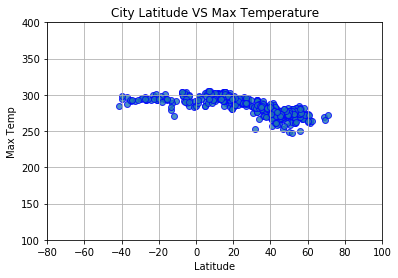

In [37]:
#Scatter plot for Latitude vs Temperature 

plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Max Temp"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Max Temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([100, 400])
plt.show()


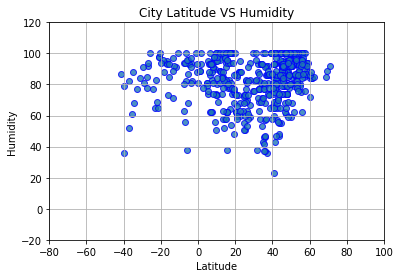

In [38]:
#Scatter plot for Latitude vs. Humidity 
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Humidity"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])
plt.show()


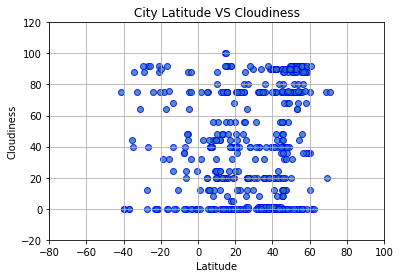

In [39]:
#Scatter plot for Latitude vs. Cloudiness 

plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Cloudiness"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim([-20, 120])
plt.xlim([-80, 100])
plt.show()

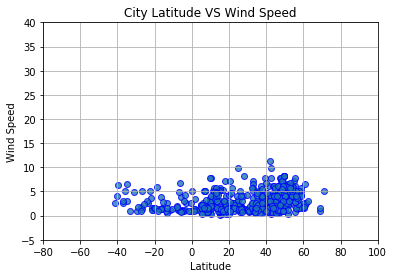

In [40]:
#Scatter plot for Latitude vs. Wind Speed 
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Wind Speed"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])
plt.show()